##### First we'll import all the basic libraries like numpy for numeric python,pandas for data manipulation and matplotlib and seaborn for data visualization

In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##### Will import the csv file directly from the url to read the dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Now we have got our final data frame.This data frame is consist of 891 rows and 12 columns and all of these columns are having float,object & int data type.As we have to predict if an arbitrary passenger on Titanic would survive the sinking or not.Since the Survived column which is the target variable and it's in the form of numeric category of 0 & 1 hence will use classification model for the prediction of the same.

### EDA Process

In [3]:
print('Shape is-',df.shape)
print('Row"s are',df.shape[0])
print('Columns are',df.shape[1])

Shape is- (891, 12)
Row"s are 891
Columns are 12


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


It's represent top 5 rows of the dataset

In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


It's represent bottom 5 rows of the dataset

In [6]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
513,514,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54.0,1,0,PC 17603,59.4,NaN,C


It's represent any one random row of the dataset

In [7]:
df.ndim

2

This shows our data is two dimensional

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Attributes- Name,Sex,Ticket,Cabin,Embarked are object data type having category form whereas rest are float or int data type.Column Survived is the target variable and it has two category 0 or 1. 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


This gives us the brief information about all the attributes like their data types, null value count,memory usage on storing the all. Hence we can say that there are some categorical attributes are present in the data frame and also there is some nan values are present too in Age and Cabin columns.Also,memory usage for storing this data is 83.7 KB

In [10]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


Above is the Boolean representaion of the null value corresponding to all the entries and it indiactes that there is some null values are present in the data frame.

In [11]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Above is the Boolean representaion of the null values w.r.t. each attributes and it indiactes that there is some null value present in the data frame in the form of True.

In [12]:
df.isnull().any().any()

True

The sum of all boolean indices is True and it indiactes that there are some null value present in the data frame

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Above is the count of the null values w.r.t. each attributes and it indiactes that there are null value present in the column Age,Cabin and Embarked

In [14]:
df.isnull().sum().sum()

866

The sum of all null indices is 866 and it indiactes that there are null value present in the data frame.

##### Heatmap Representation of Null Values

<AxesSubplot:>

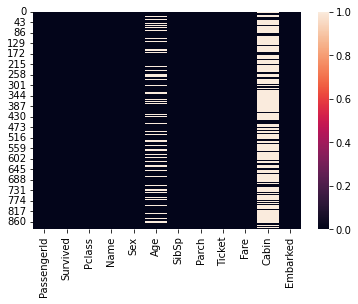

In [15]:
sns.heatmap(df.isnull())

It indiactes that there are null value present in the column Age,Cabin and Embarked

### Data Visualization

##### 1.Countplot for Categorical Columns

In [16]:
print(df.Survived.unique())
print('\n')
print(df.Survived.value_counts())

[0 1]


0    549
1    342
Name: Survived, dtype: int64


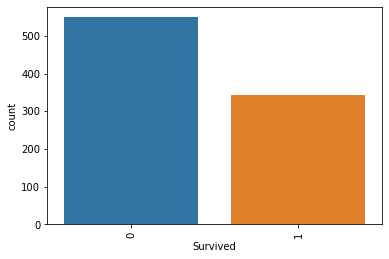

In [17]:
sns.countplot(df.Survived)
plt.xticks(rotation=90)
plt.show()

This is showing that target variable is having two categories i.e. 0 & 1 and count of 0 is 549 and 1 is 342

In [18]:
print(df.Pclass.unique())
print('\n')
print(df.Pclass.value_counts())

[3 1 2]


3    491
1    216
2    184
Name: Pclass, dtype: int64


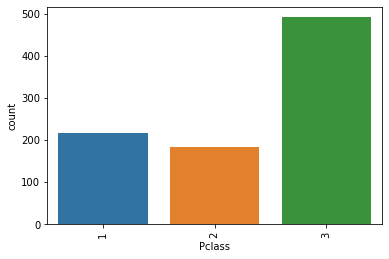

In [19]:
sns.countplot(df.Pclass)
plt.xticks(rotation=90)
plt.show()

This is showing that the variable Pclass is having three categories i.e. 1,2 & 3 

In [20]:
print(df.Sex.unique())
print('\n')
print(df.Sex.value_counts())

['male' 'female']


male      577
female    314
Name: Sex, dtype: int64


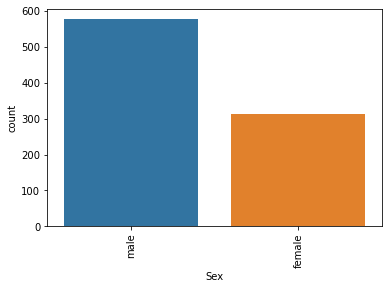

In [21]:
sns.countplot(df.Sex)
plt.xticks(rotation=90)
plt.show()

This is showing that the variable Sex is having two categories i.e. male & female

In [22]:
print(df.Age.unique())
print('\n')
print(df.Age.value_counts())

[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]


24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64


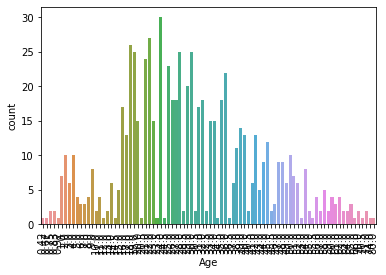

In [23]:
sns.countplot(df.Age)
plt.xticks(rotation=90)
plt.show()

Age column has total 88 unique values inside it

In [24]:
print(df.SibSp.unique())
print('\n')
print(df.SibSp.value_counts())

[1 0 3 4 2 5 8]


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


<AxesSubplot:xlabel='SibSp', ylabel='count'>

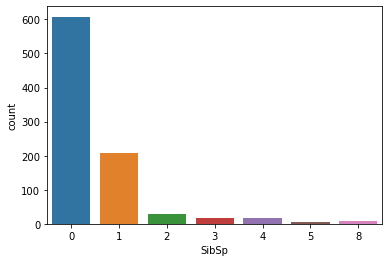

In [25]:
sns.countplot(df.SibSp)

This is showing that the variable SibSp is having 7 categories

In [26]:
print(df.Parch.unique())
print('\n')
print(df.Parch.value_counts())

[0 1 2 5 3 4 6]


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


<AxesSubplot:xlabel='Parch', ylabel='count'>

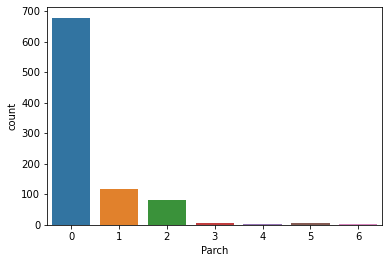

In [27]:
sns.countplot(df.Parch)

This is showing that the variable Parch is having 7 categories

In [28]:
print(df.Embarked.unique())
print('\n')
print(df.Embarked.value_counts())

['S' 'C' 'Q' nan]


S    644
C    168
Q     77
Name: Embarked, dtype: int64


<AxesSubplot:xlabel='Embarked', ylabel='count'>

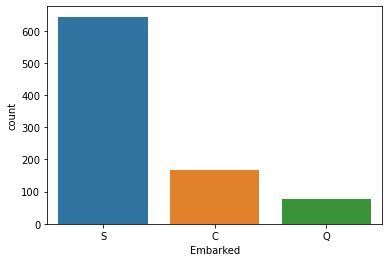

In [29]:
sns.countplot(df.Embarked)

This is showing that the variable Embarked is having 3 categories- S,C,Q

##### 2.Histogram plotting

<AxesSubplot:xlabel='Survived', ylabel='Count'>

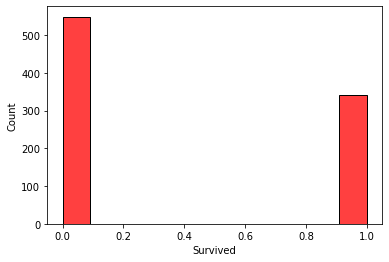

In [30]:
sns.histplot(df.Survived,color='r')

All the data is distributed b/w 0 and 1 and 0 is having large distribution as compare to 1

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

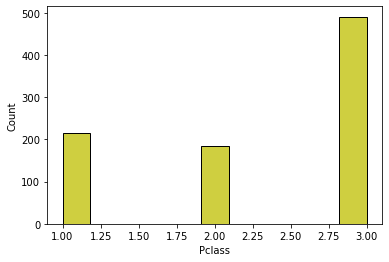

In [31]:
sns.histplot(df.Pclass,color='y')

This is showing that the variable Pclass is having three categories i.e. 1,2 & 3 and 3 has more distribution as compare to others

<AxesSubplot:xlabel='Sex', ylabel='Count'>

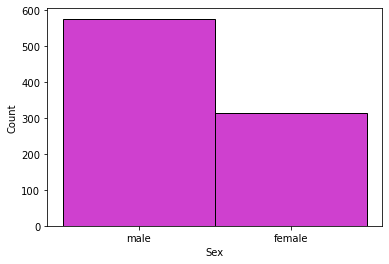

In [32]:
sns.histplot(df.Sex,color='m')

male has more distribution as compare to female

<AxesSubplot:xlabel='Age', ylabel='Count'>

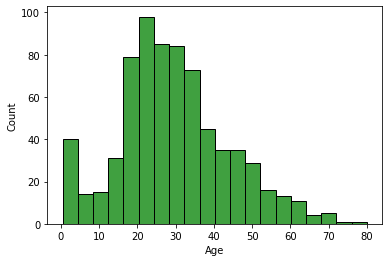

In [33]:
sns.histplot(df.Age,color='g')

Age 21-25 has more distribution as compare to other age groups

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

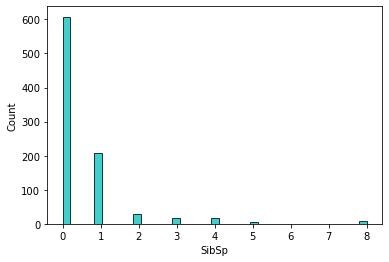

In [34]:
sns.histplot(df.SibSp,color='c')

Class 0 has more distribution as compare to others

<AxesSubplot:xlabel='Parch', ylabel='Count'>

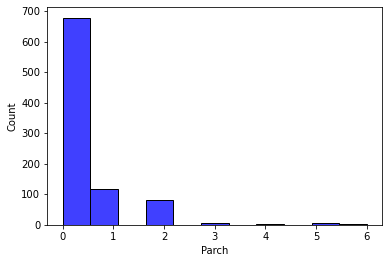

In [35]:
sns.histplot(df.Parch,color='b')

Class 0 has more distribution as compare to others

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

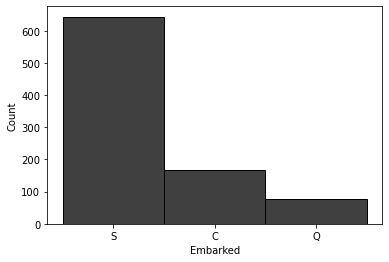

In [36]:
sns.histplot(df.Embarked,color='k')

Class S has more distribution as compare to others

##### 3.Scatter and Strip plot

<AxesSubplot:xlabel='Survived', ylabel='Embarked'>

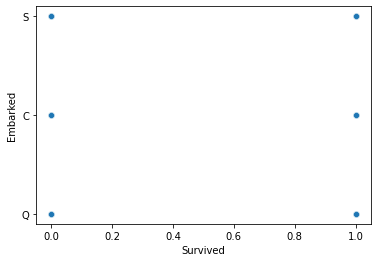

In [37]:
sns.scatterplot(df.Survived,df.Embarked)

<AxesSubplot:xlabel='Survived', ylabel='Embarked'>

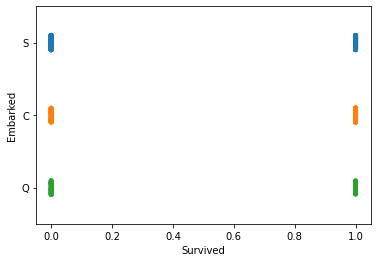

In [38]:
sns.stripplot(df.Survived,df.Embarked)

Equal distribution is there among the two variables

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

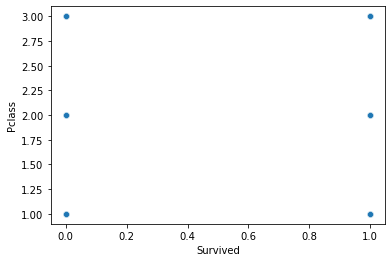

In [39]:
sns.scatterplot(df.Survived,df.Pclass)

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

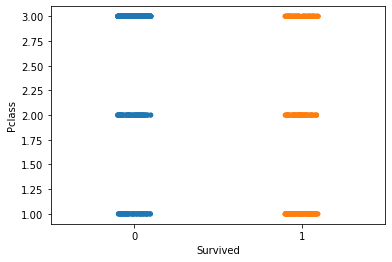

In [40]:
sns.stripplot(df.Survived,df.Pclass)

Equal distribution is there among the two variables

<AxesSubplot:xlabel='Survived', ylabel='Sex'>

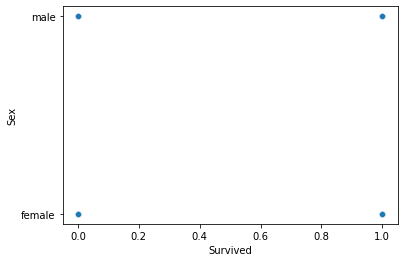

In [41]:
sns.scatterplot(df.Survived,df.Sex)

<AxesSubplot:xlabel='Survived', ylabel='Sex'>

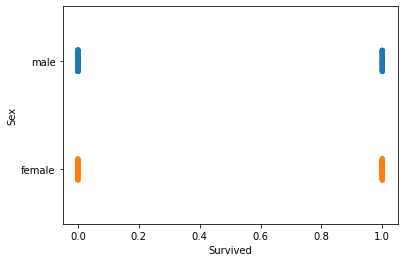

In [42]:
sns.stripplot(df.Survived,df.Sex)

Equal distribution is there among the two variables

<AxesSubplot:xlabel='Survived', ylabel='Age'>

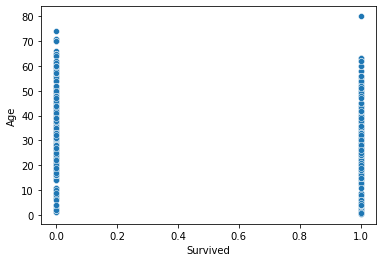

In [43]:
sns.scatterplot(df.Survived,df.Age)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

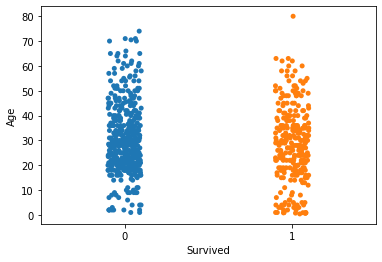

In [44]:
sns.stripplot(df.Survived,df.Age)

Almost Equal distribution is there among the two variables

<AxesSubplot:xlabel='Survived', ylabel='SibSp'>

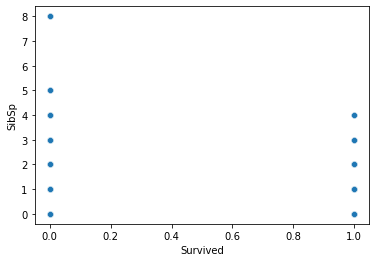

In [45]:
sns.scatterplot(df.Survived,df.SibSp)

<AxesSubplot:xlabel='Survived', ylabel='SibSp'>

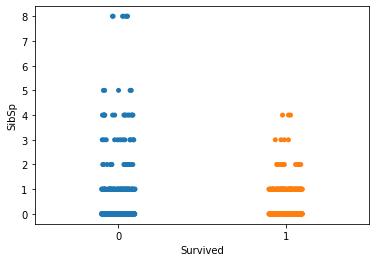

In [46]:
sns.stripplot(df.Survived,df.SibSp)

From here We can understand that less people will survive when we are compairing b/w these two variables. it means distribution is not equal among the variables

<AxesSubplot:xlabel='Survived', ylabel='Parch'>

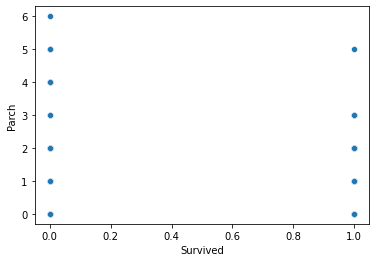

In [47]:
sns.scatterplot(df.Survived,df.Parch)

<AxesSubplot:xlabel='Survived', ylabel='Parch'>

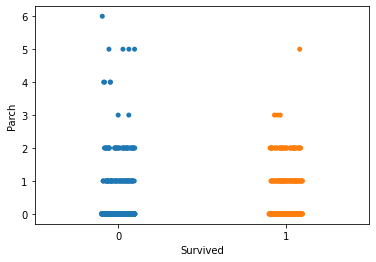

In [48]:
sns.stripplot(df.Survived,df.Parch)

Equal distribution is not there among the two variables

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

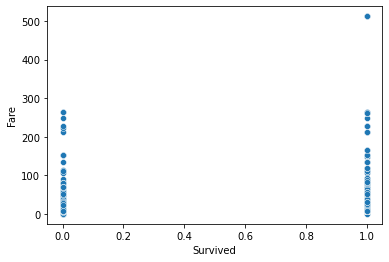

In [49]:
sns.scatterplot(df.Survived,df.Fare)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

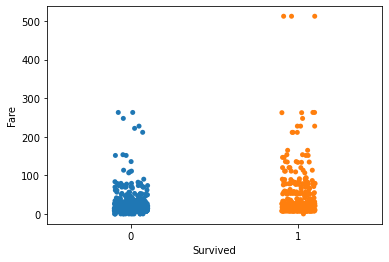

In [50]:
sns.stripplot(df.Survived,df.Fare)

This shows that the people who survives, usually gives higher fairs as compare to people who doesn't survive

##### 4.Violin plot only takes numeric columns

<AxesSubplot:xlabel='Survived'>

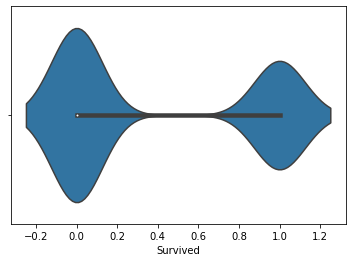

In [51]:
sns.violinplot(df.Survived)

Survived Frequency is 0 to 1 and 0 has large distribution in its side

<AxesSubplot:xlabel='Pclass'>

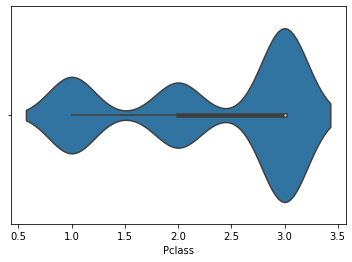

In [52]:
sns.violinplot(df.Pclass)

Pclass Frequency is 0 to 3 and 3 has large distribution in its side

<AxesSubplot:xlabel='Age'>

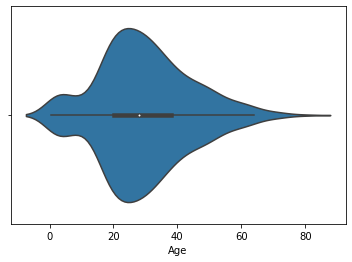

In [53]:
sns.violinplot(df.Age)

B/w 20-23 age frequency is higher

<AxesSubplot:xlabel='SibSp'>

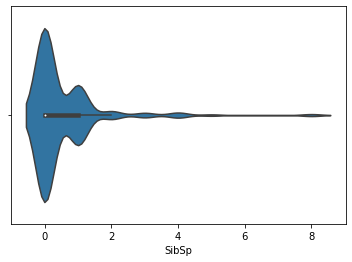

In [54]:
sns.violinplot(df.SibSp)

Sibsp has frequency 0-8 but 0 has large distribution 

<AxesSubplot:xlabel='Parch'>

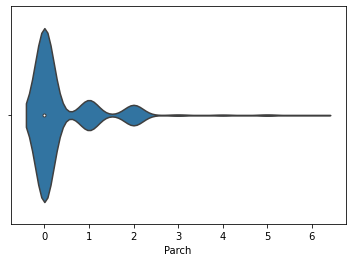

In [55]:
sns.violinplot(df.Parch)

Parch Frequency is 0 to 3 and 0 has large distribution in its side

<AxesSubplot:xlabel='Fare'>

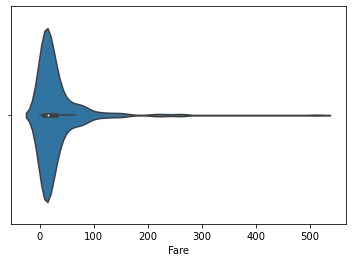

In [56]:
sns.violinplot(df.Fare)

B/w 0-25 fare frequency is higher

##### 5.Category plot

##### In category ploting one column needs to be in numeric category form

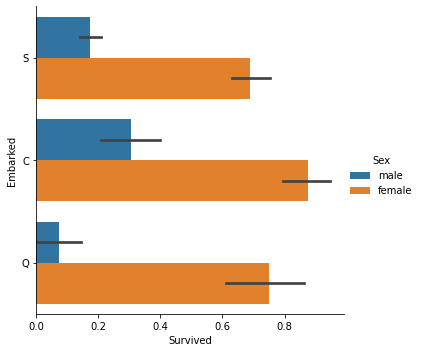

In [57]:
sns.catplot(x='Survived',y='Embarked',hue='Sex',kind='bar',data=df)

See in the above figure we can say that if a female belongs to Class C, Class Q or Class S then she would definetly going to survive in each scenario but the male from the same classes wouldn't going to survive as they have survival score les than 0.5 whereas females are having survival score more than 0.5 hence female survives and males can't  

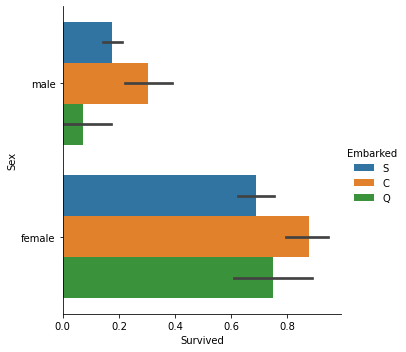

In [58]:
sns.catplot(x='Survived',y='Sex',hue='Embarked',data=df,kind='bar')

The explanation would be the same as the previous one the only difference is that Embarked and Sex columns have been interchanged.
All the females will survive in each classes S,C,Q unlike males

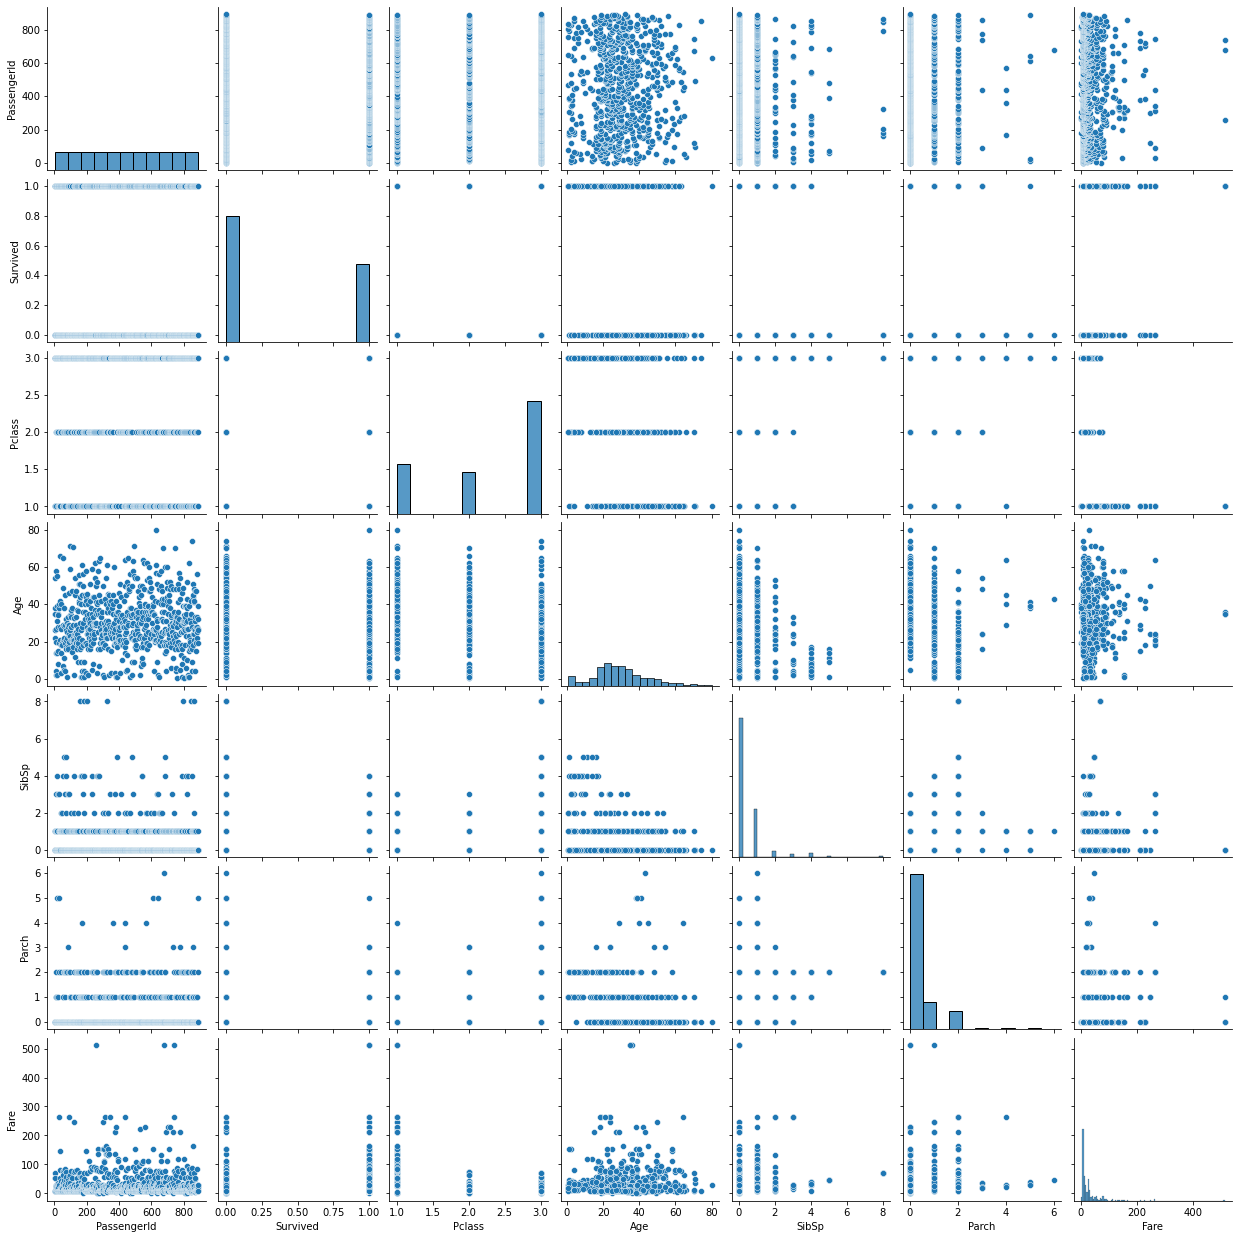

In [59]:
sns.pairplot(df)

Already Explained in earlier plotings

### Removing Null Value

In [60]:
#using Simple Imputer
import sklearn
from sklearn.impute import SimpleImputer

In [61]:
#using mean for int data types
df['Age']=SimpleImputer(missing_values=np.nan,strategy='mean').fit_transform(df['Age'].values.reshape(-1,1))
#using mode for object data types
l=['Cabin','Embarked']
for i in l:
    df[i]=SimpleImputer(missing_values=np.nan,strategy='most_frequent').fit_transform(df[i].values.reshape(-1,1))

In [62]:
df.isnull().sum().sum()

0

This shows that Null values are successfully replaced by mean and mode value

##### I'm going to drop passenger id and name columns as it's not that useful going forward

In [63]:
df1=df.drop(['PassengerId','Name'],axis=1)
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,1,1,female,35.000000,1,0,113803,53.1000,C123,S
4,0,3,male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,B96 B98,S
887,1,1,female,19.000000,0,0,112053,30.0000,B42,S
888,0,3,female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,1,1,male,26.000000,0,0,111369,30.0000,C148,C


In [64]:
df1.shape

(891, 10)

Now we have lost 2 columns in this process

### Encoder

now,will use encoder method to convert all the category string data into numeric data set

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
#converting all the categorical object data type into numerical coding
m=['Sex','Ticket','Cabin','Embarked']
for j in m:
    df1[j]=LabelEncoder().fit_transform(df1[j].astype(str))

In [67]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,523,7.2500,47,2
1,1,1,0,38.000000,1,0,596,71.2833,81,0
2,1,3,0,26.000000,0,0,669,7.9250,47,2
3,1,1,0,35.000000,1,0,49,53.1000,55,2
4,0,3,1,35.000000,0,0,472,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,101,13.0000,47,2
887,1,1,0,19.000000,0,0,14,30.0000,30,2
888,0,3,0,29.699118,1,2,675,23.4500,47,2
889,1,1,1,26.000000,0,0,8,30.0000,60,0


Here we have successfully changed all the string data types in to numeric data types

### Descriptive Statistics

In [68]:
df1.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,53.639731,1.536476
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,23.568293,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,47.000000,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,47.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,47.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,146.000000,2.000000


Here I've transposed the data frame to do the analysis more better

In [69]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
Sex,891.0,0.647587,0.477990,0.00,0.0000,1.000000,1.0,1.0000
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
Ticket,891.0,338.528620,200.850657,0.00,158.5000,337.000000,519.5,680.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292
Cabin,891.0,53.639731,23.568293,0.00,47.0000,47.000000,47.0,146.0000
Embarked,891.0,1.536476,0.791503,0.00,1.0000,2.000000,2.0,2.0000


Since Survived is the target variable and Sex,Ticket,Cabin,Embarked are the object attributes hence will not touch these and do the analysis on the remaining features.As we can see that mean of each attributes is less as compare to median of the respective attributes except variable Pclass hence there can be the possibility that outliers may be present. Also, in the Age,SibSp,Parch and Fare column the difference b/w the max value and the 3rd interquartile(IQR) is too big as compare to that of min value and 1st IQR and 1stIQR and 2nd IQR hence skewness might also come into the picture later

##### Heatmap Representation of Descriptive Statistics

<AxesSubplot:>

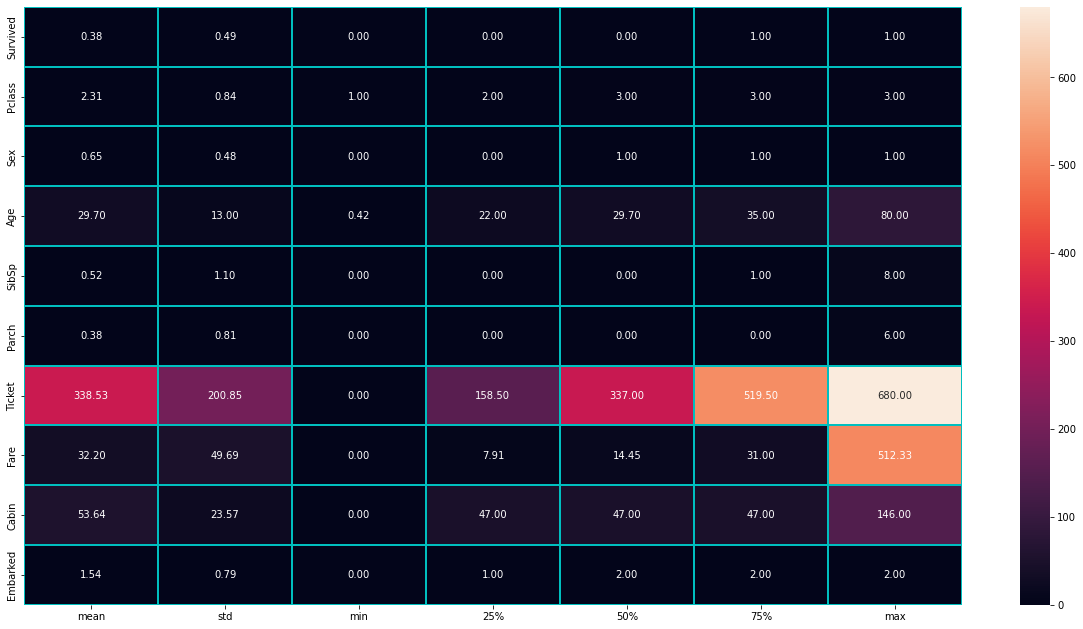

In [70]:
plt.figure(figsize=(21,11))
sns.heatmap(df1.describe()[1:].T,annot=True,linecolor='c',linewidth=0.2,fmt='0.2f')

### Correlation

In [71]:
df1.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,-0.164549,0.257307,0.175690,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,0.319869,-0.549500,-0.248495,0.162098
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,0.059372,-0.182333,-0.102643,0.108262
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,-0.068848,0.091566,0.056011,-0.026749
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.079461,0.159651,-0.005539,0.068230
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.020003,0.216225,0.022682,0.039798
Ticket,-0.164549,0.319869,0.059372,-0.068848,0.079461,0.020003,1.000000,-0.013885,-0.072200,-0.001729
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,-0.013885,1.000000,0.090516,-0.224719
Cabin,0.175690,-0.248495,-0.102643,0.056011,-0.005539,0.022682,-0.072200,0.090516,1.000000,0.023804
Embarked,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.001729,-0.224719,0.023804,1.000000


In [72]:
df1.corr().Survived.sort_values()

Sex        -0.543351
Pclass     -0.338481
Embarked   -0.167675
Ticket     -0.164549
Age        -0.069809
SibSp      -0.035322
Parch       0.081629
Cabin       0.175690
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

Will try to remove all the negative correlative columns w.r.t. Survived and they are Pclass,Age and SibSp and rest are categorical object hence will not touch them

##### Heatmap Representation of Correlation

<AxesSubplot:>

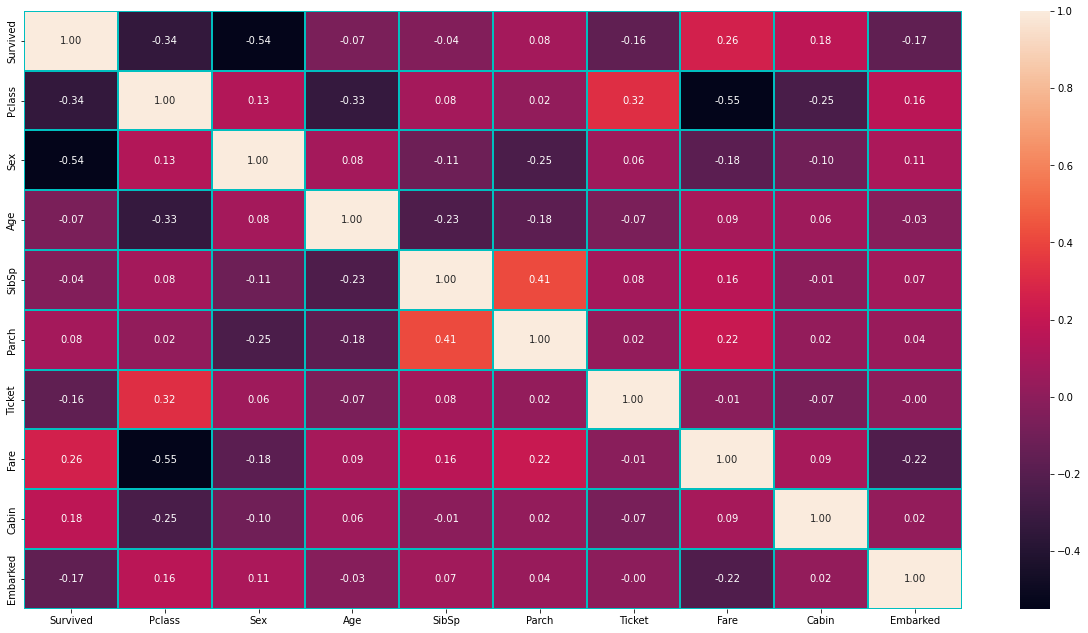

In [74]:
plt.figure(figsize=(21,11))
sns.heatmap(df1.corr(),annot=True,linecolor='c',linewidth=0.2,fmt='0.2f')

### Multicollinearity

<AxesSubplot:>

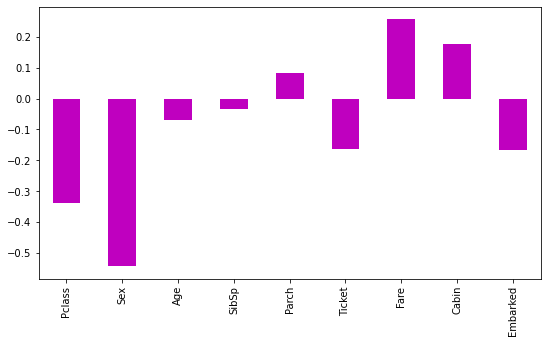

In [75]:
plt.figure(figsize=(9,5))
df1.corr().Survived.drop(['Survived']).plot(kind='bar',color='m')

Will check the possibility of multicollinearity in the next part while removing the correlation and if it exist will remove it after removing the negative correlated variables

### Skewness

In [76]:
df1.skew().sort_values()

Embarked   -1.264823
Pclass     -0.630548
Sex        -0.618921
Ticket      0.000246
Age         0.434488
Survived    0.478523
Cabin       2.268926
Parch       2.749117
SibSp       3.695352
Fare        4.787317
dtype: float64

Let's assume the Threshold value for skewness is +/-0.5. As we can see that columns Pclass,Parch,SibSp & Fare has more skewness as compare to others(we will not apply the threshold value onto the Target variable and object variables).Since skewness is +ve and _ve both hence curve will get skewed left and right both side.Hence, will remove the skewness later on once will reach to the data cleansing model.

##### Distribution Ploting to check the Normal Distribution

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

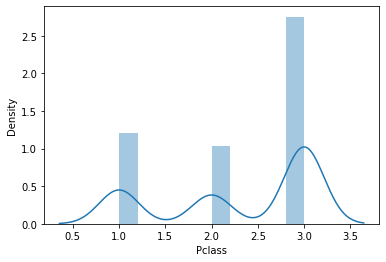

In [78]:
sns.distplot(df1.Pclass)

left skewed distribution

<AxesSubplot:xlabel='Parch', ylabel='Density'>

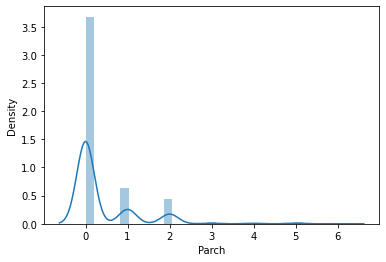

In [81]:
sns.distplot(df1.Parch)

right skewed distribution

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

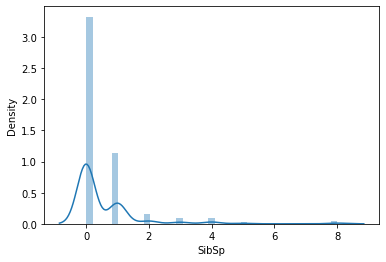

In [82]:
sns.distplot(df1.SibSp)

right skewed distribution

<AxesSubplot:xlabel='Fare', ylabel='Density'>

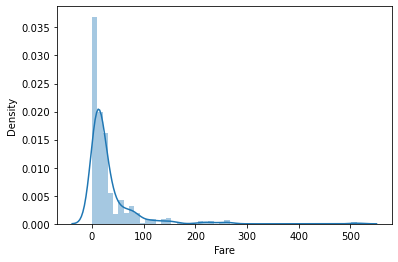

In [83]:
sns.distplot(df1.Fare)

right skewed distribution

As,we can see that not a single variable is equally distributed along the axis i.e. it's getting skewed to the either sides of the curve and we're not getting the ideal condition of Normally distributed curve where the mean is equal to zero and standard deviation is at 1.Hence will remove the skewness in the next part of Data Cleansing and make it transform to standard form so that ideal condition could be met.

### Outliers

##### Bivariate Visualization with Boxplot

<Figure size 1512x792 with 0 Axes>

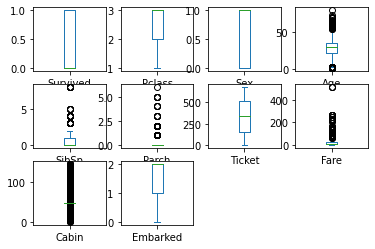

In [84]:
plt.figure(figsize=(21,11))
df1.plot(kind='box',subplots='True',layout=(3,4))
plt.show()

It shows that columns Age,Sibsp,Parch and Fare can have outliers,so will check it and remove incase it is present.

In [85]:
z=np.abs(zscore(df1))
np.where(z>3)

(array([  6,  10,  13,  16,  25,  27,  50,  59,  66,  68,  71,  75,  86,
         88,  96, 116, 118, 119, 128, 148, 159, 164, 167, 171, 180, 182,
        183, 193, 201, 205, 233, 251, 258, 261, 262, 266, 278, 299, 309,
        311, 324, 337, 339, 340, 341, 345, 360, 370, 377, 380, 386, 394,
        434, 437, 438, 438, 456, 462, 480, 493, 516, 527, 541, 542, 557,
        558, 567, 577, 585, 610, 618, 630, 638, 662, 672, 678, 679, 683,
        686, 689, 699, 700, 715, 716, 724, 730, 736, 737, 742, 745, 772,
        774, 776, 779, 787, 792, 809, 813, 824, 835, 846, 850, 851, 858,
        863, 885], dtype=int64),
 array([8, 8, 5, 4, 5, 7, 4, 4, 8, 4, 4, 8, 5, 7, 3, 3, 7, 4, 8, 8, 4, 4,
        5, 4, 4, 4, 8, 8, 4, 8, 4, 8, 7, 4, 8, 4, 4, 7, 8, 7, 4, 8, 8, 8,
        7, 8, 5, 8, 7, 7, 4, 8, 8, 5, 5, 7, 8, 8, 4, 3, 8, 7, 4, 4, 7, 8,
        5, 8, 8, 5, 8, 3, 5, 8, 3, 5, 7, 4, 4, 7, 8, 7, 8, 7, 8, 7, 5, 7,
        7, 3, 8, 5, 8, 7, 4, 4, 8, 4, 4, 8, 4, 4, 3, 5, 4, 5], dtype=int64))

It shows that most of the rows and columns are having outliers

In [87]:
z.iloc[10]

Survived    1.266990
Pclass      0.827377
Sex         1.355574
Age         1.977659
SibSp       0.432793
Parch       0.767630
Ticket      1.382257
Fare        0.312172
Cabin       3.878583
Embarked    0.585954
Name: 10, dtype: float64

In [88]:
z.iloc[10,8]

3.8785829906806697

### Data Cleansing

##### Removing Negative Correlative Columns

In [89]:
df2=df1.drop(['Pclass','Age','SibSp'],axis=1)
df2

,Survived,Sex,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,523,7.2500,47,2
1,1,0,0,596,71.2833,81,0
2,1,0,0,669,7.9250,47,2
3,1,0,0,49,53.1000,55,2
4,0,1,0,472,8.0500,47,2
...,...,...,...,...,...,...,...
886,0,1,0,101,13.0000,47,2
887,1,0,0,14,30.0000,30,2
888,0,0,2,675,23.4500,47,2
889,1,1,0,8,30.0000,60,0


Though,We have lost 3 columns in the process

### Checking Negative Multicollinearity

In [90]:
import scipy.stats
import statsmodels.api
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [91]:
x=df2.drop('Survived',axis=1)
x #Features

,Sex,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,523,7.2500,47,2
1,0,0,596,71.2833,81,0
2,0,0,669,7.9250,47,2
3,0,0,49,53.1000,55,2
4,1,0,472,8.0500,47,2
...,...,...,...,...,...,...
886,1,0,101,13.0000,47,2
887,0,0,14,30.0000,30,2
888,0,2,675,23.4500,47,2
889,1,0,8,30.0000,60,0


In [92]:
y=df2['Survived']
y #Target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [93]:
def vif():
    df3=pd.DataFrame()
    df3['Features']=x.columns
    df3['VIF_score']=[variance_inflation_factor(x.values,k) for k in range(x.shape[1])]
    print(df3)

In [94]:
vif()

   Features  VIF_score
0       Sex   2.698270
1     Parch   1.349516
2    Ticket   3.139470
3      Fare   1.510657
4     Cabin   4.126009
5  Embarked   4.031827


We can see Parch and Fare & Cabin and Embarked are giving almost same information to the target variable but since Cabin and Embarked are object data type hence will not drop thest columns.
Ergo will drop Parch as its have almost zero correlation with target variable.

In [95]:
df3=df2.drop(['Parch'],axis=1)
df3

,Survived,Sex,Ticket,Fare,Cabin,Embarked
0,0,1,523,7.2500,47,2
1,1,0,596,71.2833,81,0
2,1,0,669,7.9250,47,2
3,1,0,49,53.1000,55,2
4,0,1,472,8.0500,47,2
...,...,...,...,...,...,...
886,0,1,101,13.0000,47,2
887,1,0,14,30.0000,30,2
888,0,0,675,23.4500,47,2
889,1,1,8,30.0000,60,0


Now we have lost one more column in this process

### Removing Outliers

In [96]:
df4=df3[(z<3).all(axis=1)]
df4

,Survived,Sex,Ticket,Fare,Cabin,Embarked
0,0,1,523,7.2500,47,2
1,1,0,596,71.2833,81,0
2,1,0,669,7.9250,47,2
3,1,0,49,53.1000,55,2
4,0,1,472,8.0500,47,2
...,...,...,...,...,...,...
886,0,1,101,13.0000,47,2
887,1,0,14,30.0000,30,2
888,0,0,675,23.4500,47,2
889,1,1,8,30.0000,60,0


105 rows has been lost in this process

In [97]:
Percentage_loss=(891-786)*100/891
Percentage_loss

11.784511784511784

As the percentage loss is 12% almost & which is greater than 10% of our threshold value hence we can say that since we have a very large collection of data so we can anyhow bear these 2% extra loss,ergo will consider the outliers removal and will go ahead.

### Removing Skewness

In [98]:
from sklearn.preprocessing import power_transform

In [99]:
x=df4.drop('Survived',axis=1)
x

,Sex,Ticket,Fare,Cabin,Embarked
0,1,523,7.2500,47,2
1,0,596,71.2833,81,0
2,0,669,7.9250,47,2
3,0,49,53.1000,55,2
4,1,472,8.0500,47,2
...,...,...,...,...,...
886,1,101,13.0000,47,2
887,0,14,30.0000,30,2
888,0,675,23.4500,47,2
889,1,8,30.0000,60,0


In [100]:
y=df4['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 786, dtype: int64

In [101]:
x=power_transform(x)
x

array([[ 0.711159  ,  0.92621836, -0.81137417, -0.15241316,  0.6138499 ],
       [-1.4061553 ,  1.21533308,  1.57732674,  1.71485526, -1.77563521],
       [-1.4061553 ,  1.49316868, -0.71962956, -0.15241316,  0.6138499 ],
       ...,
       [-1.4061553 ,  1.51555536,  0.42078696, -0.15241316,  0.6138499 ],
       [ 0.711159  , -2.01129394,  0.68010369,  0.61986458, -1.77563521],
       [ 0.711159  ,  0.69127464, -0.74269295, -0.15241316, -1.22675332]])

Now the skewness has been removed with the help of power_transform method and in the next line we'll transform it into standard form to attain its ideal condition of normal distribution where mean would be at 0 and std would be at 1

In [102]:
#importing StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [103]:
x=sc.fit_transform(x)
x

array([[ 0.711159  ,  0.92621836, -0.81137417, -0.15241316,  0.6138499 ],
       [-1.4061553 ,  1.21533308,  1.57732674,  1.71485526, -1.77563521],
       [-1.4061553 ,  1.49316868, -0.71962956, -0.15241316,  0.6138499 ],
       ...,
       [-1.4061553 ,  1.51555536,  0.42078696, -0.15241316,  0.6138499 ],
       [ 0.711159  , -2.01129394,  0.68010369,  0.61986458, -1.77563521],
       [ 0.711159  ,  0.69127464, -0.74269295, -0.15241316, -1.22675332]])

In [104]:
x.mean()

1.3559975873284355e-18

In [105]:
x.std()

1.0

Since,We are getting mean as almost zero and std as 1, which shows that our feature variables has transformed into the standard form where the normal distribution condition is now applicable.

### Balancing the Dataset of Target Variable

In [106]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Since this is the classification problem but the dataset 0 & 1 are imbalanced, so will going to balance it first then will move into training and testing phase

In [107]:
import sklearn
print('sklearn_version-',sklearn.__version__)
print('numpy_version-',np.__version__)
print('pandas_version-',pd.__version__)

sklearn_version- 1.1.2
numpy_version- 1.20.3
pandas_version- 1.3.4


!pip install -U imbalanced-learn

In [108]:
#importing SMOTE Technique
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)
y.value_counts()

0    485
1    485
Name: Survived, dtype: int64

Now,as we can see that we have got both the classes of target variable as equal count

In [109]:
y

0      0
1      1
2      1
3      1
4      0
      ..
965    1
966    1
967    1
968    1
969    1
Name: Survived, Length: 970, dtype: int64

Our target variable has total 970 rows

In [110]:
x

array([[ 0.711159  ,  0.92621836, -0.81137417, -0.15241316,  0.6138499 ],
       [-1.4061553 ,  1.21533308,  1.57732674,  1.71485526, -1.77563521],
       [-1.4061553 ,  1.49316868, -0.71962956, -0.15241316,  0.6138499 ],
       ...,
       [-1.4061553 ,  0.51595953, -0.07298702, -0.15241316, -1.43002922],
       [-1.4061553 , -1.43301905,  1.72847785, -1.30935604, -1.77563521],
       [-1.4061553 ,  0.94787349,  1.39494997,  2.08708129, -1.77563521]])

In [111]:
x.shape

(970, 5)

Our feature variables have total 970 rows and 5 columns

### Training and Testing Phase

In [112]:
#importing machine learning libraries for classification model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
lr=LogisticRegression()

In [115]:
#will finding best value of random_state
for h in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=h)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if accuracy_score(pred_train,y_train) == accuracy_score(pred_test,y_test):
        print('At random_state',h,'the model perform very well')
        print('At random_state',h)
        print('Training Accuracy Score is- ',accuracy_score(pred_train,y_train))
        print('Testing Accuracy Score is- ',accuracy_score(pred_test,y_test))
        print('\n')

At random_state 12 the model perform very well
At random_state 12
Training Accuracy Score is-  0.7783505154639175
Testing Accuracy Score is-  0.7783505154639175


At random_state 37 the model perform very well
At random_state 37
Training Accuracy Score is-  0.7783505154639175
Testing Accuracy Score is-  0.7783505154639175


At random_state 185 the model perform very well
At random_state 185
Training Accuracy Score is-  0.7783505154639175
Testing Accuracy Score is-  0.7783505154639175


At random_state 235 the model perform very well
At random_state 235
Training Accuracy Score is-  0.7783505154639175
Testing Accuracy Score is-  0.7783505154639175


At random_state 304 the model perform very well
At random_state 304
Training Accuracy Score is-  0.7783505154639175
Testing Accuracy Score is-  0.7783505154639175


At random_state 417 the model perform very well
At random_state 417
Training Accuracy Score is-  0.7783505154639175
Testing Accuracy Score is-  0.7783505154639175


At random_stat

Since,at random_state 471 my model training and testing accuracy is same,hence will selecting random_state as 471 for the Logistic Regression model

In [116]:
#Traing the Logistic Regression Model at Random_State 471
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=471)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
print('Training Accuracy Score for Logistic model is',accuracy_score(y_train,pred_train))
print('Testing Accuracy Score for Logistic model is',accuracy_score(y_test,pred_test))
print('\n Classification Report-\n',classification_report(y_test,pred_test))
print('\n Confusion Metrix-\n',confusion_matrix(y_test,pred_test))

Training Accuracy Score for Logistic model is 0.7835051546391752
Testing Accuracy Score for Logistic model is 0.7835051546391752

 Classification Report-
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       102
           1       0.79      0.74      0.76        92

    accuracy                           0.78       194
   macro avg       0.78      0.78      0.78       194
weighted avg       0.78      0.78      0.78       194


 Confusion Metrix-
 [[84 18]
 [24 68]]


This shows that testing accuarcy and Training Accuracy of the Logistic model is (78%) but still there might be possibillity of overfitting or underfitting,hence will move ahead and find out Cross Validation Score to compare it with testing accuracy.
Also there are type-I and type-II error are there as we can see from confusion matrix.

### Cross Validation Score

In [117]:
from sklearn.model_selection import cross_val_score

In [122]:
for l in range(2,15):
    cvscore=cross_val_score(lr,x,y,cv=l)
    cv_accuracy_score=cvscore.mean()
    print(f'At the K-Fold {l} the Cross Value Score is {cv_accuracy_score}')
    print(f'The Testing accuracy Score of Logistic Regression Model is {accuracy_score(y_test,pred_test)}')
    print('\n')

At the K-Fold 2 the Cross Value Score is 0.7793814432989691
The Testing accuracy Score of Logistic Regression Model is 0.7835051546391752


At the K-Fold 3 the Cross Value Score is 0.7670119379785701
The Testing accuracy Score of Logistic Regression Model is 0.7835051546391752


At the K-Fold 4 the Cross Value Score is 0.7742577288031834
The Testing accuracy Score of Logistic Regression Model is 0.7835051546391752


At the K-Fold 5 the Cross Value Score is 0.7701030927835051
The Testing accuracy Score of Logistic Regression Model is 0.7835051546391752


At the K-Fold 6 the Cross Value Score is 0.7762888837768065
The Testing accuracy Score of Logistic Regression Model is 0.7835051546391752


At the K-Fold 7 the Cross Value Score is 0.7722343864039204
The Testing accuracy Score of Logistic Regression Model is 0.7835051546391752


At the K-Fold 8 the Cross Value Score is 0.7742260533803007
The Testing accuracy Score of Logistic Regression Model is 0.7835051546391752


At the K-Fold 9 the 

I have selected K-Fold cv method and divided the rows frequency in to the combination of 15 instances. At cv=2 Logistic Regression model testing accuracy is 78% and cv score is 78% which is really good accuracy and also we have got the optimal condition of low bias and variance acheived 

In [123]:
cvscore=cross_val_score(lr,x,y,cv=2)
cv_accuracy_score=cvscore.mean()
print(f'At the K-Fold {2} the Cross Value Score for logistic Regression Model is {cv_accuracy_score}')
print(f'The Testing accuracy Score of Logistic Regression Model is {accuracy_score(y_test,pred_test)}')

At the K-Fold 2 the Cross Value Score for logistic Regression Model is 0.7793814432989691
The Testing accuracy Score of Logistic Regression Model is 0.7835051546391752


##### Now will move forward and check the CV Score for all other models as well

In [121]:
#importing other libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import roc_curve,roc_auc_score
gb=GaussianNB()
neighbor=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()
grd=GradientBoostingClassifier()

In [124]:
#creating a definition to expand the model individually
def model(algorithm,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=471)
    algorithm.fit(x_train,y_train)
    pred_train_x=algorithm.predict(x_train)
    pred_test_y=algorithm.predict(x_test)
    print('For',algorithm)
    print('Training_Accuracy_Score=',accuracy_score(y_train,pred_train_x))
    print('Testing_Accuracy_Score=',accuracy_score(y_test,pred_test_y))
    print('\n Classification Report-\n',classification_report(y_test,pred_test_y))
    print('\n Confusion Metrix-\n',confusion_matrix(y_test,pred_test_y))
    print('\n\nAUC_ROC CURVE')
    prob=algorithm.predict_proba(x_test)[:,1]
    FPR,TPR,THRESHOLD=roc_curve(y_test,prob)
    plt.plot(FPR,TPR)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC_Curve')
    plt.show()
    ROC_AUC_SCORE=roc_auc_score(y_test,pred_test_y)
    print('ROC AUC SCORE is-',ROC_AUC_SCORE)
    print('\n')
    print('Finding out the best K-Fold Value')
    print('\n\t')
    for l in range(2,15):
        cvscore=cross_val_score(algorithm,x,y,cv=l)
        cv_accuracy_score=cvscore.mean()
        print(f'At the K-Fold {l} the CV score of model {algorithm} is {cv_accuracy_score}')
        print('\n')

For LogisticRegression()
Training_Accuracy_Score= 0.7835051546391752
Testing_Accuracy_Score= 0.7835051546391752

 Classification Report-
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       102
           1       0.79      0.74      0.76        92

    accuracy                           0.78       194
   macro avg       0.78      0.78      0.78       194
weighted avg       0.78      0.78      0.78       194


 Confusion Metrix-
 [[84 18]
 [24 68]]


AUC_ROC CURVE


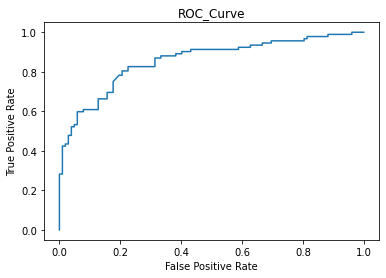

ROC AUC SCORE is- 0.7813299232736572


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model LogisticRegression() is 0.7793814432989691


At the K-Fold 3 the CV score of model LogisticRegression() is 0.7670119379785701


At the K-Fold 4 the CV score of model LogisticRegression() is 0.7742577288031834


At the K-Fold 5 the CV score of model LogisticRegression() is 0.7701030927835051


At the K-Fold 6 the CV score of model LogisticRegression() is 0.7762888837768065


At the K-Fold 7 the CV score of model LogisticRegression() is 0.7722343864039204


At the K-Fold 8 the CV score of model LogisticRegression() is 0.7742260533803007


At the K-Fold 9 the CV score of model LogisticRegression() is 0.7721433791008038


At the K-Fold 10 the CV score of model LogisticRegression() is 0.7721649484536083


At the K-Fold 11 the CV score of model LogisticRegression() is 0.7722165474974463


At the K-Fold 12 the CV score of model LogisticRegression() is 0.7731738683127571


At the K

In [125]:
model(lr,x,y)

At K-Fold 2 the CV Score of model LogisticRegression() is 78% & Testing Accuracy of model LinearRegression() is 78% which is good accuracy and ROC AUC SCORE is- 78% too hence model perform really outstanding

For GaussianNB()
Training_Accuracy_Score= 0.7847938144329897
Testing_Accuracy_Score= 0.7783505154639175

 Classification Report-
               precision    recall  f1-score   support

           0       0.79      0.78      0.79       102
           1       0.76      0.77      0.77        92

    accuracy                           0.78       194
   macro avg       0.78      0.78      0.78       194
weighted avg       0.78      0.78      0.78       194


 Confusion Metrix-
 [[80 22]
 [21 71]]


AUC_ROC CURVE


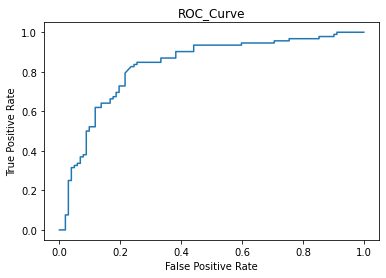

ROC AUC SCORE is- 0.7780264279624893


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model GaussianNB() is 0.7804123711340206


At the K-Fold 3 the CV score of model GaussianNB() is 0.7814502669163832


At the K-Fold 4 the CV score of model GaussianNB() is 0.7793890079243614


At the K-Fold 5 the CV score of model GaussianNB() is 0.781443298969072


At the K-Fold 6 the CV score of model GaussianNB() is 0.7814456969046342


At the K-Fold 7 the CV score of model GaussianNB() is 0.7835470753831718


At the K-Fold 8 the CV score of model GaussianNB() is 0.7824651131283025


At the K-Fold 9 the CV score of model GaussianNB() is 0.7814218683896773


At the K-Fold 10 the CV score of model GaussianNB() is 0.7804123711340206


At the K-Fold 11 the CV score of model GaussianNB() is 0.7814560312006684


At the K-Fold 12 the CV score of model GaussianNB() is 0.7814043209876543


At the K-Fold 13 the CV score of model GaussianNB() is 0.7804573804573803


At the K-Fold 14 the 

In [126]:
model(gb,x,y)

At K-Fold 2 the CV Score of model GaussianNB(),Testing Accuracy and ROC AUC SCORE is 78% hence model perform really outstanding

For KNeighborsClassifier()
Training_Accuracy_Score= 0.854381443298969
Testing_Accuracy_Score= 0.8092783505154639

 Classification Report-
               precision    recall  f1-score   support

           0       0.84      0.79      0.81       102
           1       0.78      0.83      0.80        92

    accuracy                           0.81       194
   macro avg       0.81      0.81      0.81       194
weighted avg       0.81      0.81      0.81       194


 Confusion Metrix-
 [[81 21]
 [16 76]]


AUC_ROC CURVE


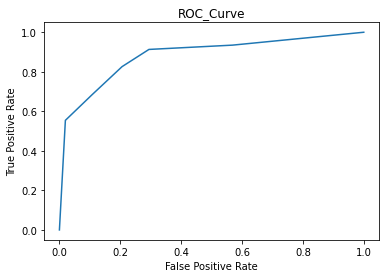

ROC AUC SCORE is- 0.8101023017902814


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model KNeighborsClassifier() is 0.7762886597938145


At the K-Fold 3 the CV score of model KNeighborsClassifier() is 0.7845685382665085


At the K-Fold 4 the CV score of model KNeighborsClassifier() is 0.7773824099581675


At the K-Fold 5 the CV score of model KNeighborsClassifier() is 0.788659793814433


At the K-Fold 6 the CV score of model KNeighborsClassifier() is 0.7918423944993993


At the K-Fold 7 the CV score of model KNeighborsClassifier() is 0.7939511744641553


At the K-Fold 8 the CV score of model KNeighborsClassifier() is 0.7867074244682293


At the K-Fold 9 the CV score of model KNeighborsClassifier() is 0.7846525133648705


At the K-Fold 10 the CV score of model KNeighborsClassifier() is 0.7958762886597938


At the K-Fold 11 the CV score of model KNeighborsClassifier() is 0.785657906955149


At the K-Fold 12 the CV score of model KNeighborsClassifier() is 0.7846707

In [127]:
model(neighbor,x,y)

At K-Fold 10 the CV Score of model KNeighborsClassifier(),Testing Accuracy and ROC AUC SCORE is almost 80% hence model perform really outstanding

For DecisionTreeClassifier()
Training_Accuracy_Score= 0.9935567010309279
Testing_Accuracy_Score= 0.8195876288659794

 Classification Report-
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       102
           1       0.83      0.78      0.80        92

    accuracy                           0.82       194
   macro avg       0.82      0.82      0.82       194
weighted avg       0.82      0.82      0.82       194


 Confusion Metrix-
 [[87 15]
 [20 72]]


AUC_ROC CURVE


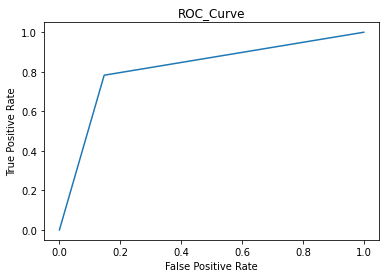

ROC AUC SCORE is- 0.8177749360613811


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model DecisionTreeClassifier() is 0.7628865979381443


At the K-Fold 3 the CV score of model DecisionTreeClassifier() is 0.7587623743454497


At the K-Fold 4 the CV score of model DecisionTreeClassifier() is 0.781489133761861


At the K-Fold 5 the CV score of model DecisionTreeClassifier() is 0.7886597938144329


At the K-Fold 6 the CV score of model DecisionTreeClassifier() is 0.7794200342509522


At the K-Fold 7 the CV score of model DecisionTreeClassifier() is 0.7867047976525612


At the K-Fold 8 the CV score of model DecisionTreeClassifier() is 0.7876981438829427


At the K-Fold 9 the CV score of model DecisionTreeClassifier() is 0.7639994615591709


At the K-Fold 10 the CV score of model DecisionTreeClassifier() is 0.7824742268041237


At the K-Fold 11 the CV score of model DecisionTreeClassifier() is 0.7661342743058781


At the K-Fold 12 the CV score of model DecisionTreeCl

In [128]:
model(dtc,x,y)

At K-Fold 8 the CV Score of model DecisionTreeClassifier(),Testing Accuracy and ROC AUC SCORE is almost 80% hence model perform really outstanding

For RandomForestClassifier()
Training_Accuracy_Score= 0.9935567010309279
Testing_Accuracy_Score= 0.8298969072164949

 Classification Report-
               precision    recall  f1-score   support

           0       0.84      0.83      0.84       102
           1       0.82      0.83      0.82        92

    accuracy                           0.83       194
   macro avg       0.83      0.83      0.83       194
weighted avg       0.83      0.83      0.83       194


 Confusion Metrix-
 [[85 17]
 [16 76]]


AUC_ROC CURVE


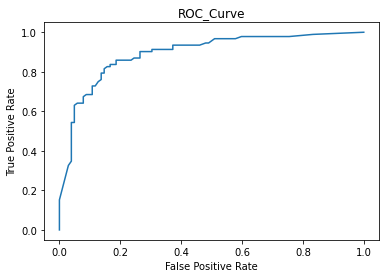

ROC AUC SCORE is- 0.8297101449275363


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model RandomForestClassifier() is 0.7814432989690722


At the K-Fold 3 the CV score of model RandomForestClassifier() is 0.8010740358521575


At the K-Fold 4 the CV score of model RandomForestClassifier() is 0.7928102574567221


At the K-Fold 5 the CV score of model RandomForestClassifier() is 0.8020618556701031


At the K-Fold 6 the CV score of model RandomForestClassifier() is 0.8144761393553664


At the K-Fold 7 the CV score of model RandomForestClassifier() is 0.8042361142142187


At the K-Fold 8 the CV score of model RandomForestClassifier() is 0.806267782143341


At the K-Fold 9 the CV score of model RandomForestClassifier() is 0.8041998384677512


At the K-Fold 10 the CV score of model RandomForestClassifier() is 0.7999999999999999


At the K-Fold 11 the CV score of model RandomForestClassifier() is 0.8011073451573961


At the K-Fold 12 the CV score of model RandomForestCl

In [130]:
model(rfc,x,y)

At K-Fold 13 the CV Score of model RandomForestClassifier(),Testing Accuracy and ROC AUC SCORE is almost 82% hence model perform really outstanding

For AdaBoostClassifier()
Training_Accuracy_Score= 0.8247422680412371
Testing_Accuracy_Score= 0.7577319587628866

 Classification Report-
               precision    recall  f1-score   support

           0       0.78      0.75      0.77       102
           1       0.74      0.76      0.75        92

    accuracy                           0.76       194
   macro avg       0.76      0.76      0.76       194
weighted avg       0.76      0.76      0.76       194


 Confusion Metrix-
 [[77 25]
 [22 70]]


AUC_ROC CURVE


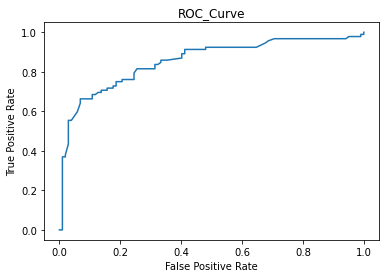

ROC AUC SCORE is- 0.7578857630008524


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model AdaBoostClassifier() is 0.777319587628866


At the K-Fold 3 the CV score of model AdaBoostClassifier() is 0.780424645491725


At the K-Fold 4 the CV score of model AdaBoostClassifier() is 0.7855788524980445


At the K-Fold 5 the CV score of model AdaBoostClassifier() is 0.7752577319587628


At the K-Fold 6 the CV score of model AdaBoostClassifier() is 0.788660123201186


At the K-Fold 7 the CV score of model AdaBoostClassifier() is 0.7856025738415479


At the K-Fold 8 the CV score of model AdaBoostClassifier() is 0.7887142663595719


At the K-Fold 9 the CV score of model AdaBoostClassifier() is 0.7804026768201224


At the K-Fold 10 the CV score of model AdaBoostClassifier() is 0.78659793814433


At the K-Fold 11 the CV score of model AdaBoostClassifier() is 0.7845784195375615


At the K-Fold 12 the CV score of model AdaBoostClassifier() is 0.792772633744856


At the K-Fold 

In [131]:
model(ad,x,y)

At K-Fold 2 the CV Score of model AdaBoostClassifier(),Testing Accuracy and ROC AUC SCORE is almost 76% hence model perform really outstanding

For GradientBoostingClassifier()
Training_Accuracy_Score= 0.8981958762886598
Testing_Accuracy_Score= 0.7938144329896907

 Classification Report-
               precision    recall  f1-score   support

           0       0.79      0.82      0.81       102
           1       0.80      0.76      0.78        92

    accuracy                           0.79       194
   macro avg       0.79      0.79      0.79       194
weighted avg       0.79      0.79      0.79       194


 Confusion Metrix-
 [[84 18]
 [22 70]]


AUC_ROC CURVE


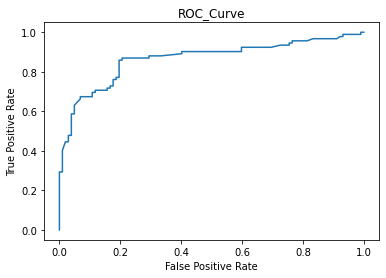

ROC AUC SCORE is- 0.7921994884910486


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model GradientBoostingClassifier() is 0.8


At the K-Fold 3 the CV score of model GradientBoostingClassifier() is 0.7938214272063601


At the K-Fold 4 the CV score of model GradientBoostingClassifier() is 0.7917771996054825


At the K-Fold 5 the CV score of model GradientBoostingClassifier() is 0.7876288659793813


At the K-Fold 6 the CV score of model GradientBoostingClassifier() is 0.7928264703627024


At the K-Fold 7 the CV score of model GradientBoostingClassifier() is 0.7939362795477903


At the K-Fold 8 the CV score of model GradientBoostingClassifier() is 0.8041847310662511


At the K-Fold 9 the CV score of model GradientBoostingClassifier() is 0.7876812430291142


At the K-Fold 10 the CV score of model GradientBoostingClassifier() is 0.7989690721649485


At the K-Fold 11 the CV score of model GradientBoostingClassifier() is 0.7948741758751973


At the K-Fold 12 the CV sco

In [132]:
model(grd,x,y)

At K-Fold 13 the CV Score of model GradientBoostingClassifier(),Testing Accuracy and ROC AUC SCORE is almost 80% hence model perform really outstanding

##### Hence we can say that out of all the above 7 models Random Forest Regressor  performs outstandingly

### Hyper Parameter Tuning

In [133]:
from sklearn.model_selection import GridSearchCV

##### Now I'll find out the best combination of parameters for each model

In [150]:
dict1={'weights':['uniform', 'distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
dict2={'criterion':["gini", "entropy", "log_loss"],'splitter':["best", "random"],'max_features':["auto", "sqrt", "log2"]}
dict3={'gamma':['scale', 'auto']}
dict4={'criterion' : ["gini", "entropy", "log_loss"],'max_features':["sqrt", "log2", None],'class_weight':["balanced", "balanced_subsample"]}
dict5={'algorithm':['SAMME', 'SAMME.R']}
dict6={'loss':['log_loss', 'deviance', 'exponential'],'criterion':['friedman_mse', 'squared_error', 'mse'],'max_features':['auto', 'sqrt', 'log2']}

In [134]:
#Now I'm defining a function so that i can individuallay let the model perfom and give the best parameter out of it.
def HPT(machine,dictionary):
    gd=GridSearchCV(machine,dictionary)
    gd.fit(x,y)
    print(f'The best Parameters of the model {machine} is {gd.best_params_}')

In [137]:
HPT(neighbor,dict1)

The best Parameters of the model KNeighborsClassifier() is {'algorithm': 'auto', 'weights': 'distance'}


In [138]:
HPT(dtc,dict2)

The best Parameters of the model DecisionTreeClassifier() is {'criterion': 'log_loss', 'max_features': 'auto', 'splitter': 'random'}


In [151]:
HPT(svc,dict3)

The best Parameters of the model SVC() is {'gamma': 'scale'}


In [140]:
HPT(rfc,dict4)

The best Parameters of the model RandomForestClassifier() is {'class_weight': 'balanced', 'criterion': 'log_loss', 'max_features': 'sqrt'}


In [141]:
HPT(ad,dict5)

The best Parameters of the model AdaBoostClassifier() is {'algorithm': 'SAMME'}


In [142]:
HPT(grd,dict6)

The best Parameters of the model GradientBoostingClassifier() is {'criterion': 'friedman_mse', 'loss': 'exponential', 'max_features': 'sqrt'}


In [158]:
#Redefining the models after getting the parameters
lr=LogisticRegression()
gb=GaussianNB()
neighbor=KNeighborsClassifier(algorithm='auto',weights='distance')
dtc=DecisionTreeClassifier(criterion='log_loss',max_features='auto',splitter='random')
svc=SVC(gamma='scale')
rfc=RandomForestClassifier(class_weight= 'balanced',criterion='log_loss',max_features='sqrt')
ad=AdaBoostClassifier(algorithm= 'SAMME')
grd=GradientBoostingClassifier(criterion='friedman_mse',loss= 'exponential',max_features= 'sqrt')

For KNeighborsClassifier(weights='distance')
Training_Accuracy_Score= 0.9935567010309279
Testing_Accuracy_Score= 0.8247422680412371

 Classification Report-
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       102
           1       0.81      0.83      0.82        92

    accuracy                           0.82       194
   macro avg       0.82      0.82      0.82       194
weighted avg       0.83      0.82      0.82       194


 Confusion Metrix-
 [[84 18]
 [16 76]]


AUC_ROC CURVE


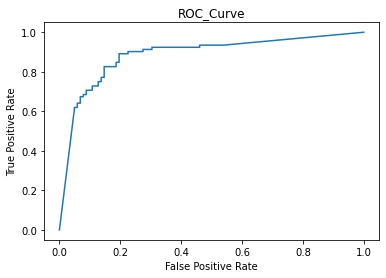

ROC AUC SCORE is- 0.8248081841432225


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model KNeighborsClassifier(weights='distance') is 0.7731958762886598


At the K-Fold 3 the CV score of model KNeighborsClassifier(weights='distance') is 0.7928244722190371


At the K-Fold 4 the CV score of model KNeighborsClassifier(weights='distance') is 0.7918112097405027


At the K-Fold 5 the CV score of model KNeighborsClassifier(weights='distance') is 0.8030927835051547


At the K-Fold 6 the CV score of model KNeighborsClassifier(weights='distance') is 0.8041944636147534


At the K-Fold 7 the CV score of model KNeighborsClassifier(weights='distance') is 0.8021657208394776


At the K-Fold 8 the CV score of model KNeighborsClassifier(weights='distance') is 0.8062931852052567


At the K-Fold 9 the CV score of model KNeighborsClassifier(weights='distance') is 0.8000942271451099


At the K-Fold 10 the CV score of model KNeighborsClassifier(weights='distance') is 0.811340206185567

In [145]:
model(neighbor,x,y)

##### At K-Fold 10 the CV Score of model KNeighborsClassifier(weights='distance'),Testing Accuracy and ROC AUC SCORE is almost 82% hence model perform really outstanding

For DecisionTreeClassifier(criterion='log_loss', max_features='auto',
                       splitter='random')
Training_Accuracy_Score= 0.9935567010309279
Testing_Accuracy_Score= 0.8350515463917526

 Classification Report-
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       102
           1       0.84      0.80      0.82        92

    accuracy                           0.84       194
   macro avg       0.84      0.83      0.83       194
weighted avg       0.84      0.84      0.83       194


 Confusion Metrix-
 [[88 14]
 [18 74]]


AUC_ROC CURVE


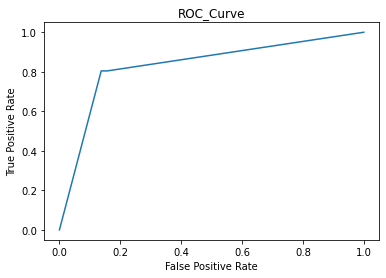

ROC AUC SCORE is- 0.8335464620630861


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model DecisionTreeClassifier(criterion='log_loss', max_features='auto',
                       splitter='random') is 0.7721649484536082


At the K-Fold 3 the CV score of model DecisionTreeClassifier(criterion='log_loss', max_features='auto',
                       splitter='random') is 0.7567015760170216


At the K-Fold 4 the CV score of model DecisionTreeClassifier(criterion='log_loss', max_features='auto',
                       splitter='random') is 0.777288882086862


At the K-Fold 5 the CV score of model DecisionTreeClassifier(criterion='log_loss', max_features='auto',
                       splitter='random') is 0.78659793814433


At the K-Fold 6 the CV score of model DecisionTreeClassifier(criterion='log_loss', max_features='auto',
                       splitter='random') is 0.7783592771515476


At the K-Fold 7 the CV score of model DecisionTreeClassifier(criterion='log_l

In [146]:
model(dtc,x,y)

##### At K-Fold 11 the CV Score of model DecisionTreeClassifier(criterion='log_loss', max_features='auto',  splitter='random'),Testing Accuracy and ROC AUC SCORE is almost 83% hence model perform really outstanding

For RandomForestClassifier(class_weight='balanced', criterion='log_loss')
Training_Accuracy_Score= 0.9935567010309279
Testing_Accuracy_Score= 0.845360824742268

 Classification Report-
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       102
           1       0.84      0.84      0.84        92

    accuracy                           0.85       194
   macro avg       0.84      0.84      0.84       194
weighted avg       0.85      0.85      0.85       194


 Confusion Metrix-
 [[87 15]
 [15 77]]


AUC_ROC CURVE


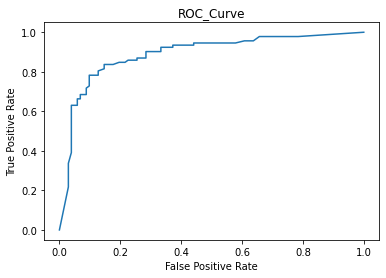

ROC AUC SCORE is- 0.8449488491048592


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model RandomForestClassifier(class_weight='balanced', criterion='log_loss') is 0.7927835051546391


At the K-Fold 3 the CV score of model RandomForestClassifier(class_weight='balanced', criterion='log_loss') is 0.8010676655327499


At the K-Fold 4 the CV score of model RandomForestClassifier(class_weight='balanced', criterion='log_loss') is 0.7969424888616808


At the K-Fold 5 the CV score of model RandomForestClassifier(class_weight='balanced', criterion='log_loss') is 0.8020618556701031


At the K-Fold 6 the CV score of model RandomForestClassifier(class_weight='balanced', criterion='log_loss') is 0.8082841295401683


At the K-Fold 7 the CV score of model RandomForestClassifier(class_weight='balanced', criterion='log_loss') is 0.8031860226104831


At the K-Fold 8 the CV score of model RandomForestClassifier(class_weight='balanced', criterion='log_loss') is 0.8073008399945807




In [147]:
model(rfc,x,y)

##### At K-Fold 13 the CV Score of model RandomForestClassifier(class_weight='balanced', criterion='log_loss'),Testing Accuracy and ROC AUC SCORE is almost 84% hence model perform really outstanding

For AdaBoostClassifier(algorithm='SAMME')
Training_Accuracy_Score= 0.7860824742268041
Testing_Accuracy_Score= 0.7577319587628866

 Classification Report-
               precision    recall  f1-score   support

           0       0.76      0.78      0.77       102
           1       0.75      0.73      0.74        92

    accuracy                           0.76       194
   macro avg       0.76      0.76      0.76       194
weighted avg       0.76      0.76      0.76       194


 Confusion Metrix-
 [[80 22]
 [25 67]]


AUC_ROC CURVE


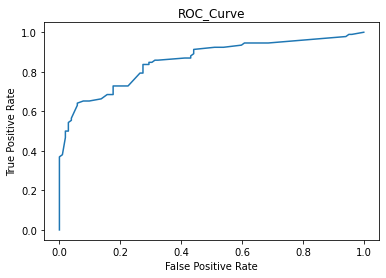

ROC AUC SCORE is- 0.7562872975277067


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.7783505154639174


At the K-Fold 3 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.7773382257386386


At the K-Fold 4 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.7742322212019181


At the K-Fold 5 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.7762886597938143


At the K-Fold 6 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.774256831020116


At the K-Fold 7 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.7794658682991493


At the K-Fold 8 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.7824989838775234


At the K-Fold 9 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.7845563632167993


At the K-Fold 10 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.781443298969072


At the K-Fold 11 the CV s

In [148]:
model(ad,x,y)

##### At K-Fold 2 the CV Score of model AdaBoostClassifier(algorithm='SAMME'),Testing Accuracy and ROC AUC SCORE is almost 75% hence model perform really outstanding

For GradientBoostingClassifier(loss='exponential', max_features='sqrt')
Training_Accuracy_Score= 0.8646907216494846
Testing_Accuracy_Score= 0.788659793814433

 Classification Report-
               precision    recall  f1-score   support

           0       0.80      0.79      0.80       102
           1       0.77      0.78      0.78        92

    accuracy                           0.79       194
   macro avg       0.79      0.79      0.79       194
weighted avg       0.79      0.79      0.79       194


 Confusion Metrix-
 [[81 21]
 [20 72]]


AUC_ROC CURVE


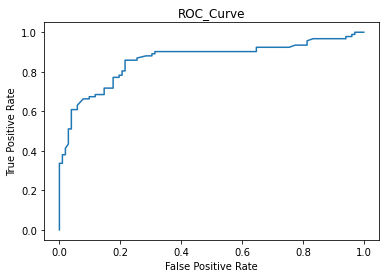

ROC AUC SCORE is- 0.7883631713554987


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model GradientBoostingClassifier(loss='exponential', max_features='sqrt') is 0.7969072164948454


At the K-Fold 3 the CV score of model GradientBoostingClassifier(loss='exponential', max_features='sqrt') is 0.798962274968467


At the K-Fold 4 the CV score of model GradientBoostingClassifier(loss='exponential', max_features='sqrt') is 0.7804560759106214


At the K-Fold 5 the CV score of model GradientBoostingClassifier(loss='exponential', max_features='sqrt') is 0.7927835051546392


At the K-Fold 6 the CV score of model GradientBoostingClassifier(loss='exponential', max_features='sqrt') is 0.7897336605066073


At the K-Fold 7 the CV score of model GradientBoostingClassifier(loss='exponential', max_features='sqrt') is 0.8000506427156412


At the K-Fold 8 the CV score of model GradientBoostingClassifier(loss='exponential', max_features='sqrt') is 0.7989940387481371


At the K-Fold 9

In [149]:
model(grd,x,y)

##### At K-Fold 2 the CV Score of model GradientBoostingClassifier(loss='exponential', max_features='sqrt'),Testing Accuracy and ROC AUC SCORE is almost 79% hence model perform really outstanding

#### I'm selecting Random Forest Regressor as the best model that performs really well out of rest models and given accuracy score as 84%

##### Saving the model into the system

In [160]:
#importing the job library
import joblib

In [161]:
#creating a file name and saving it with dump method
file=('rfc.obj')
joblib.dump(rfc,file)

['rfc.obj']

#### Importing/Loading the model

In [162]:
#calling the file with load method
a=joblib.load(file)
a

RandomForestClassifier(class_weight='balanced', criterion='log_loss')

### conclusion

###### As we can see that the predicted Survived and the orginal Survived values are almost same and the testing accuracy is more than 84% which indiactes our model performs really excellent throughout the process and we have successfully made the prediction for an arbitrary passenger on Titanic would survive the sinking or not. 